# Feature Scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardization

### Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [2]:
#Import Dataset
df=pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [5]:
df=pd.get_dummies(df,columns=['State'])

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X=df.drop('Profit',axis=1)
Y=df['Profit']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
print(X.shape)
print(x_train.shape)

(50, 6)
(40, 6)


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Creat an object for the scaler class

scaler=StandardScaler()

In [12]:
#Scaling the features

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [13]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
33,55493.95,103057.49,214634.81,0,1,0
35,46014.02,85047.44,205517.64,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
34,46426.07,157693.92,210797.67,1,0,0
18,91749.16,114175.79,294919.57,0,1,0


In [14]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_scaled.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,-0.350065,-0.785471,0.101197,-0.816497,1.732051,-0.733799
1,-0.555303,-1.481174,0.027350,-0.816497,-0.577350,1.362770
2,0.079358,0.801334,-0.551521,-0.816497,1.732051,-0.733799
3,-0.546382,1.325058,0.070117,1.224745,-0.577350,-0.733799
4,0.434854,-0.355987,0.751485,-0.816497,1.732051,-0.733799


In [15]:
np.round(x_train_scaled.describe(),1)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
count,40.0,40.0,40.0,40.0,40.0,40.0
mean,-0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.6,-2.8,-1.6,-0.8,-0.6,-0.7
25%,-0.8,-0.4,-0.6,-0.8,-0.6,-0.7
50%,-0.0,0.1,0.0,-0.8,-0.6,-0.7
75%,0.6,0.8,0.8,1.2,0.0,1.4
max,2.0,1.3,2.2,1.2,1.7,1.4


Our dataset is now standardized as the mean is reduced to zero and standard deviation has become 1.

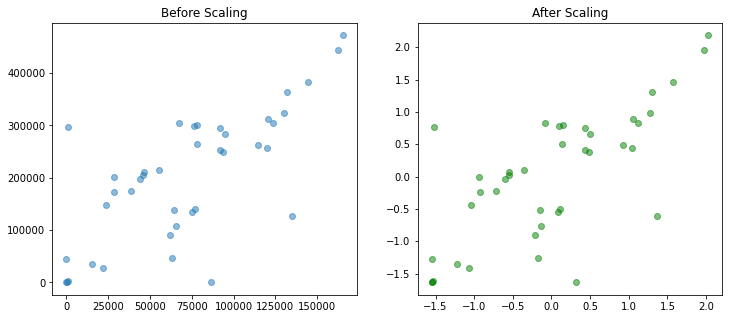

In [16]:


fig,ax=plt.subplots(1,2,figsize=(12,5))

# before scaling
ax[0].scatter(x_train['R&D Spend'],x_train['Marketing Spend'],alpha=0.5)
ax[0].set_title('Before Scaling')

# after scaling
ax[1].scatter(x_train_scaled['R&D Spend'],x_train_scaled['Marketing Spend'],color='green',alpha=0.5)
ax[1].set_title('After Scaling')

plt.show()

Text(0.5, 1.0, 'After Scaling')

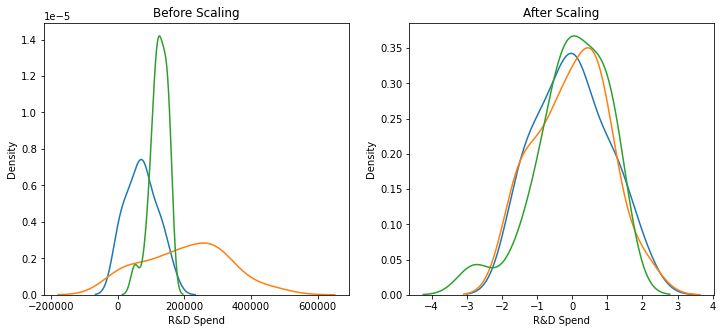

In [17]:
fig,ax=plt.subplots(1,2, figsize=(12,5))

# before scaling
sns.kdeplot(x_train['R&D Spend'],ax=ax[0])
sns.kdeplot(x_train['Marketing Spend'],ax=ax[0])
sns.kdeplot(x_train['Administration'],ax=ax[0])
ax[0].set_title('Before Scaling')

# after scaling
sns.kdeplot(x_train_scaled['R&D Spend'],ax=ax[1])
sns.kdeplot(x_train_scaled['Marketing Spend'],ax=ax[1])
sns.kdeplot(x_train_scaled['Administration'],ax=ax[1])
ax[1].set_title('After Scaling')

We can observe that the distribution of the data is now scaled but the shape is still the same. The shape of the dustribution before scaling and after scaling  is unchanged and can be seen in the below graph.

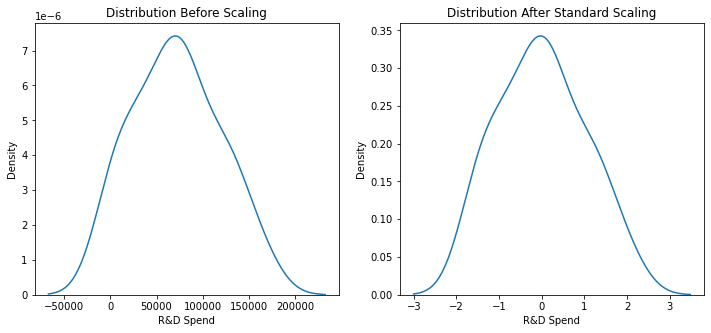

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))

# before scaling
ax[0].set_title('Distribution Before Scaling')
sns.kdeplot(x_train['R&D Spend'], ax=ax[0])

# after scaling
ax[1].set_title('Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['R&D Spend'], ax=ax[1])
plt.show()

### Now let's check how standardization impacts the model performance

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(x_train,y_train)
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(x_test)
y_scaled_pred=lr.predict(x_test_scaled)

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [24]:
r2_score(y_pred,y_test), r2_score(y_test,y_scaled_pred)

(-5.081667766829076, 0.9347068473282428)

In [25]:
mean_squared_error(y_test,y_pred)

2.04992200104914e+19

In [26]:
mean_squared_error(y_test,y_scaled_pred)

83502864.03257689

# Normalization

### Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [27]:
#Import Dataset
df=pd.read_csv('wine_data.csv',header=None)

In [28]:
df.sample(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
141,3,13.36,2.56,2.35,20.0,89,1.4,0.50,0.37,0.64,5.6,0.70,2.47,780
150,3,13.50,3.12,2.62,24.0,123,1.4,1.57,0.22,1.25,8.6,0.59,1.30,500


In [29]:
df.shape

(178, 14)

In [30]:
df=pd.read_csv('wine_data.csv',usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [31]:
df.head()

,Class label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


In [32]:
X=df.drop('Class label',axis=1)
Y=df['Class label']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [34]:
print(x_train.shape)
print(x_test.shape)

(141, 2)
(36, 2)


In [35]:
#Creating an object for MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [36]:
#Scaling the Data

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [37]:
#Converting the output arrays to Dataframe

x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [38]:
x_train_scaled.head()

,Alcohol,Malic acid
0,0.715054,0.482688
1,0.338710,0.395112
2,0.387097,0.128310
3,0.637097,0.615071
4,0.543011,0.236253


In [39]:
print('Before Scalindg the data is \n' ,x_train.describe(),'\n\n\n')
print('After Scalindg the data is \n',x_train_scaled.describe())


Before Scalindg the data is 
           Alcohol  Malic acid
count  141.000000  141.000000
mean    12.971631    2.345603
std      0.783095    1.134943
min     11.030000    0.890000
25%     12.340000    1.600000
50%     13.050000    1.880000
75%     13.620000    3.120000
max     14.750000    5.800000 



After Scalindg the data is 
           Alcohol  Malic acid
count  141.000000  141.000000
mean     0.521944    0.296457
std      0.210509    0.231149
min      0.000000    0.000000
25%      0.352151    0.144603
50%      0.543011    0.201629
75%      0.696237    0.454175
max      1.000000    1.000000


We can see that after scaling with min-max scaler the min is now 0 and max is 1.

### Representing scaling through plots

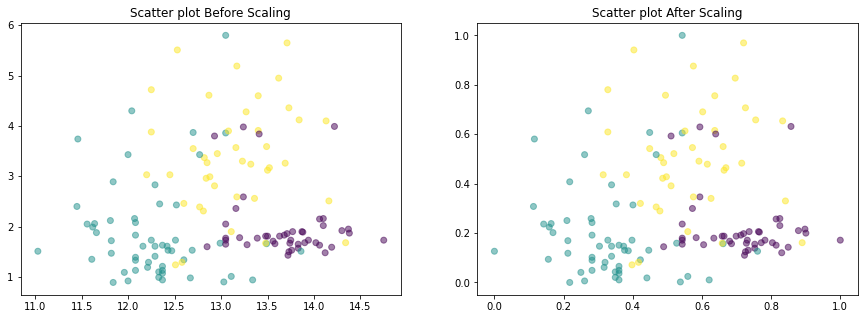

In [40]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].scatter(x_train['Alcohol'],x_train['Malic acid'],alpha=0.5,c=y_train)
ax[0].set_title('Scatter plot Before Scaling')

# after scaling
ax[1].scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],alpha=0.5,c=y_train)
ax[1].set_title('Scatter plot After Scaling')

plt.show()

The distribution of data points is same before and after scaling.

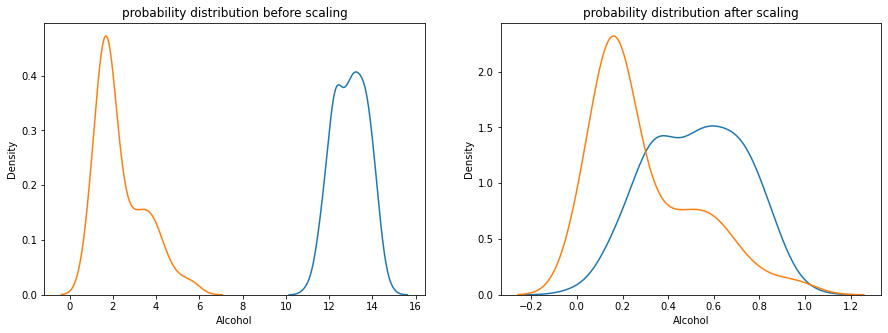

In [41]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

sns.kdeplot(x_train['Alcohol'],ax=ax[0])
sns.kdeplot(x_train['Malic acid'],ax=ax[0])
ax[0].set_title('probability distribution before scaling')

sns.kdeplot(x_train_scaled['Alcohol'],ax=ax[1])
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax[1])
ax[1].set_title('probability distribution after scaling')

plt.show()


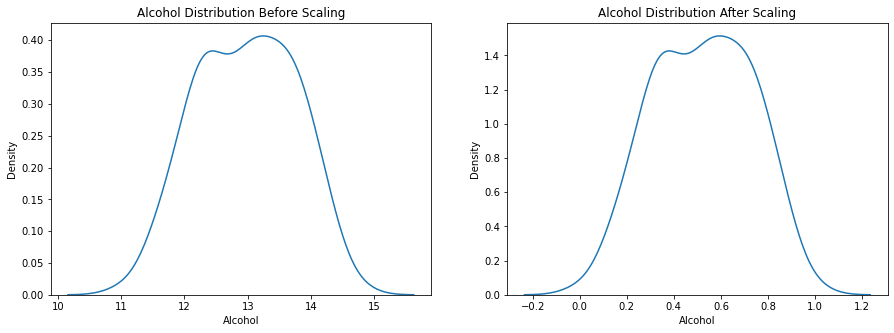

In [42]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

sns.kdeplot(x_train['Alcohol'],ax=ax[0])
ax[0].set_title('Alcohol Distribution Before Scaling')

sns.kdeplot(x_train_scaled['Alcohol'],ax=ax[1])
ax[1].set_title('Alcohol Distribution After Scaling')

plt.show()

It is clear that by performing Normalization the shape of the distribution remains the same but the scale is reduced to (0,1)